<center>

# EE2703 - Assignment 7

## Name : ANIRUDH B S
## Roll No : EE21B019
</center>

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

### Assumption -
The above packages are installed. If the above packages are not installed, some of the cells may not run. Please install them before proceeding forward. 

## Relation with Statistical Mechanics
The process of swapping is best explained using Statistical Mechanics - using the Canonical Ensemble. Consider a heat bath at temperature T, with our system being in a particular energy state E. The probability of it being in that particular energy state (that is, P(E)) is given by the canonical ensemble which is - 
<html>
    <center>
        P(E) = $\frac{1}{Z}e^{\frac{-E}{kT}}$ <br>
        where, Z is the partition function for the system and k is Boltzman constant.
    </center>
</html>
Intuitively, it makes sense to jump from higher energy to lower energy without expenditure of energy, that is here, we should permit bestcost to be modified to y if y at any instant is less than bestcost. Thermodynamically, this indicates free energy of the system is decreasing, leading to stability - here it is minimization 

Now, if we need to go from lower energy to higher energy, we need to spend some energy. The probability of this transition happening is given by - 
<html>
    <center>
        P(E) = $k_1e^{\frac{-\Delta E}{kT}}$ <br>
        where k1 is Arrhenius constant
    </center>
</html>
If we have energy $\Delta$ E1 higher than $\Delta$ E, the transition should be permitted. Say the probability of this happening is given by 
<html>
    <center>
        $P_1$(E) = $k_1e^{\frac{-\Delta E_1}{kT}}$ <br>
        where k1 is Arrhenius constant
    </center>
</html>
Now, since $\Delta$ $E_1$ > $\Delta$ E, $P_1$(E) < P(E). Since $\Delta$ $E_1$ occurs purely randomly, we model it using a uniform random varible. Intuitively, this represents crossing a barrier to go from one minima to potentially another possible minima. 

Thus, I have explained both the sources of randomness which has been described later as well. In short, there are two situations when we must update our bestx and best cost, this is when toss (the uniform RV) is less than the probability of transition and obviously, when y is less than best cost. For the other left out case, nothing needs to be done.

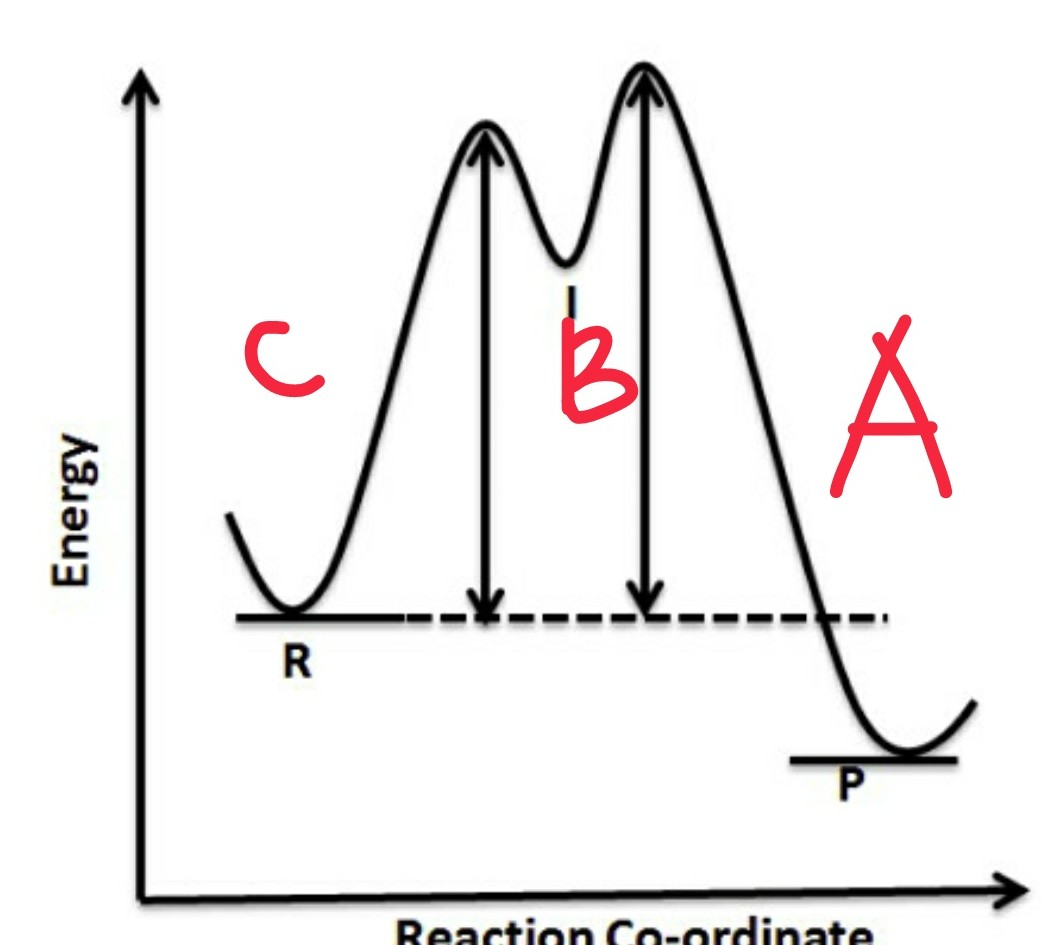

In the above figure, 
- A is the situation when y < bestcost and energy decreases - we modify best cost
- B is the situation when y > bestcost, toss < probability of transition, energy initially increases but decreases later - we modify best cost here also (this is the situation of $\Delta$ $E_1$ > $\Delta$ E)
- C is the situation when y > bestcost, toss > probability of transition, energy needed for transition is not available - so we do not permit the transition. 

Thus, intuitively, the simulated annealing should work well. 

## Simulated Annealing

In [2]:
bestcost = 1e10  #Set initial best cost to 10^10
bestx = -2  #Set best x to be -2

In [3]:
def SimulatedAnnealing(f, x0, T, decayrate):
    global bestcost, bestx
    bestcost = f(x0)
    bestx = x0
    dx = (np.random.random_sample() - 0.5) * T  #Compute change (depends on Temperature)
    x = bestx + dx  #Update x
    y = f(x) #Get y
    if y < bestcost: #If y is less than best cost, update best cost and bestx
        bestcost = y
        bestx = x
    else:
        toss = np.random.random_sample() #else get a uniform random variable and if it is less than probability of swap - then swap
        if toss < np.exp(-(y-bestcost)/T):
            bestcost = y
            bestx = x
    return bestx, bestcost   

### What does SimulatedAnnealing() do ?
The simulated annealing function takes 4 parameters as asked in the question description 
- f is the function that needs to be optimized (maximised or minimised)
- xo is the initial starting point
- temp is the initial temperature T of the system
- decay_rate, as the name says, is the decay rate of temperature T of the system.

It performs simulated annealing on f, starting at xo at temperature T and then tries to find out the minimum point in this assignment. The intuitive reasoning (my understanding) as to why simulated annealing works has been explained above.

In [4]:
#Define functions and parameters which will be used
def f(x):
    return x**2 + np.sin(8*x)
x0 = -2
T = 3.0
decayrate = 0.95

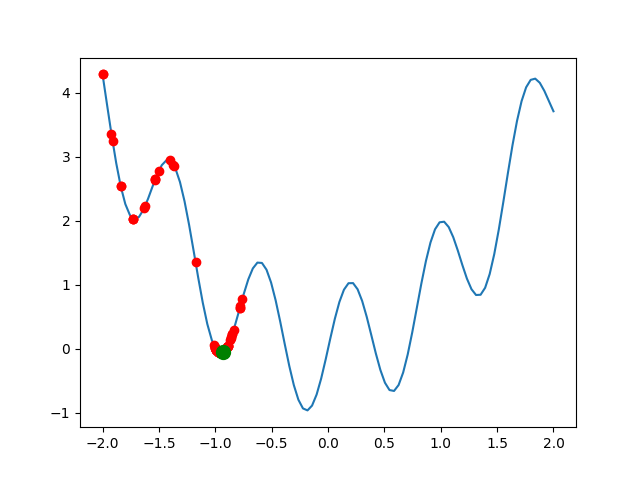

In [5]:
figsa, axsa = plt.subplots()  #Create figure and axis
xbase = np.linspace(-2,2,100) #Get x axis values to plot 
ybase = f(xbase)              #Get y axis values to plot
axsa.plot(xbase, ybase)       #Plot graph
xall, yall = [], []
lnall,  = axsa.plot([], [], 'ro') #To plots all points visited in red
lngood, = axsa.plot([], [], 'go', markersize=10) #Plot current point in green

def onestep(frame):
    global x0, T, decayrate
    xnew, ynew = SimulatedAnnealing(f,x0,T,decayrate) #Run SA once
    xall.append(xnew)
    yall.append(ynew)
    lnall.set_data(xall, yall)   #Plot all values in red
    lngood.set_data(xnew, ynew)  #Plot current value in green
    x0 = xnew                    #Update starting point
    T = decayrate * T            #Update Temperature
    return lngood,

ani = FuncAnimation(figsa, onestep, frames = range(100), interval = 100, repeat = False)
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani.save('SimulatedAnnealingExample.mp4', writer=writervideo) #Video of the Simulated Annealing Approach
plt.show()

### What does the above cell do ?
The above cell plots the graph for simulated annealing on a simple 2D function. As asked in the problem statement, the plot has been shown for the function given in the presentation.

In [6]:
print(f"The best x is {bestx} and value of the cost is {bestcost}") #Print output

The best x is -0.9496647485155054 and value of the cost is -0.06537917517275027


## The Travelling Salesman Problem

In [7]:
import ipywidgets as wdg
import sys

### Assumption : 
ipywidgets needs to be installed to exploit the interactivity available on Jupyter notebook which has been done in this Assignment.

sys is used to exit when invalid file name is entered.

In [8]:
cities = []    #List to store [x,y] coordinates of cities - list of lists
x_cities = []  #List to store the x coordinates of cities
y_cities = []  #List to y store the y coordinates of cities
N = 0          #To store the number of cities N

The above cells creates four global variables whose functions are mentioned in the comments against the same.
All these are obtained from the user by calling the main() function later on.

## Moves Available
There are infinitely many moves possible out of which I shall try contrasting two different moves - 
- Move #1 - given a permutation x, pick an index at random and swap the two indices (controlled randomness)
- Move #2 - generate a permutation x at random (total randomness)

I chose the above two possibilities as it explains the difference between - almost zero randomness (two swaps would hardly do any major change to the possible outcome) and extreme randomness (it is equally likely you may endup with a better sequence or a worst sequence). As it turns out, the initial sequence entered has a significant role to play. If your initial sequence is quite close to the optimal sequence, Move #1 gives much better results. However, if your initial sequence is quite far from the optimal sequence, Move #2 gives much better results. 

This is shown quite clearly in the cells below and the difference has been explicitly contrasted.

In [9]:
# Move #1
def AnnealingMoveSwap(f, xo, temp, decay_rate):
    bestcost = f(xo)        #Set initial best cost to be f(xo)
    bestx = xo              #Set initial best x to be xo
    itermax = 0             #To count the number of iterations
    x = xo                  #x will be the variable I shall use to perform annealing
    while itermax <= 1e6 :
        if itermax == 0:
            x = xo          #Set initial x to be xo
        else :
            r1 = np.random.randint(0, N-1) #Random number r1 is generated
            x[r1], x[r1+1] = x[r1+1], x[r1]
        y = f(x)            #Find the value of cost for this random permutation
        if y < bestcost :   #If cost is less, then make this the best else switch with probability exp(-(y-bestcost)/T)
            bestcost = y    
            bestx = x
        else :
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/temp) :
                bestcost = y  #Switch best cost to y 
                bestx = x
        temp = temp * decay_rate #Reduce temperature
        itermax += 1 #Increase iteration number
    return bestx, bestcost

In [10]:
# Move #2
def Annealing(f, xo, temp, decay_rate):
    bestcost = f(xo)        #Set initial best cost to be f(xo)
    bestx = xo              #Set initial best x to be xo
    itermax = 0             #To count the number of iterations
    x = xo                  #x will be the variable I shall use to perform annealing
    while itermax <= 1e6 :
        if itermax == 0:
            x = xo          #Set initial x to be xo
        else :
            x = np.random.permutation(len(xo)) #Random permutation of x is generated 
        y = f(x)            #Find the value of cost for this random permutation
        if y < bestcost :   #If cost is less, then make this the best else switch with probability exp(-(y-bestcost)/T)
            bestcost = y    
            bestx = x
        else :
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/temp) :
                bestcost = y  #Switch best cost to y 
                bestx = x
        temp = temp * decay_rate #Reduce temperature
        itermax += 1 #Increase iteration number
    return bestx, bestcost

### What does Annealing() do ?
The annealing function takes 4 parameters as asked in the question description 
- f is the function that needs to be optimized (maximised or minimised)
- xo is the initial starting point
- temp is the initial temperature T of the system
- decay_rate, as the name says, is the decay rate of temperature T of the system.

It performs simulated annealing on f, starting at xo at temperature T and then tries to find out the minimum point in this assignment. The intuitive reasoning (my understanding) as to why simulated annealing works has been explained above.

In [11]:
def dist(a, b): #Computes distance between two indices a and b of list cities
    global cities
    p1 = cities[a]
    p2 = cities[b]
    dx = p1[0] - p2[0]  #Difference in x coordinates
    dy = p1[1] - p2[1]  #Difference in y coordinates
    ds = np.sqrt(np.power(dx,2) + np.power(dy, 2)) #Distance Formula
    return ds

### What does dist(a,b) do ?
a and b are two numbers that are in the range of 0 through N-1, N being the number of cities in consideration. dist(a,b) returns the euclidean distance ds = $\sqrt{dx^2 + dy^2}$ between two cities indexed in the city global list at indices a and b. This shall be used later to add distances in the sum later on.

In [12]:
def f(x): #Returns the total distance of a permutation of city numbers from 0 to N-1 which is our Objective Function
    totaldist = 0
    for i in range(len(x)-1):
        totaldist += dist(x[i], x[i+1]) #Computes total distance
    totaldist += dist(x[0], x[len(x)-1]) #Add distance from last point to first point. 
    return totaldist

### What does f(x) do ?
Given a permutation x of the cities, f(x) computes the length of the total path encompassing those cities. Say for example, the permutation x is [0, 2, 1] for a 3 city problem, f(x) will return the following sum - distance between 0 and 2, distance between 2 and 1, distance between 1 and 0 (return path). 

In [13]:
name = input("Enter the name of the file with the .txt extension ") #Take input name of file
if name[-4:] != ".txt" :
    sys.exit("Enter a valid extension")   #Exit if extension is not valid

Enter the name of the file with the .txt extension tsp_10.txt


In [14]:
def main(T, gamma):
    lines  = []
    global x_cities, y_cities, N
    datapoints = []
    global name
    with open(name) as f1:
        alllines = f1.readlines()  #Open file and extract data
        lines = alllines[1:]
    for line in lines :
        s = line.split()
        x = float(s[0])  #Extract x coordinate 
        y = float(s[1])  #Extract y coordinate
        x_cities.append(x)
        y_cities.append(y)
        datapoints.append([x,y]) #Append to list named datapoints, a list [x,y]
    N = int(alllines[0]) 
    xo = np.random.permutation(N) #Generate a random permutation; could be initial starting value as well
    global cities
    cities = datapoints
    x, y = Annealing(f, xo, T, gamma) #Run simulated annealing (either Annealing or AnnealingMoveSwap)
    return x,y

### What does main(T, gamma) do ?
main(T, gamma) takes in two parameters T - the temperature initially and gamma - the temperature decay factor and computes the minimum cost based on simulated annealing and returns x - the best possible permutation and y - the best possible sum of distance based on permutation x. 

As mentioned earlier, since this is a probabilistic approach, we cannot assure success for this approach, but can assign some non zero probability of finding the optimal solution.

In [15]:
xopt, yopt = main(2500, 0.95) #Obtain Optimal values 

/tmp/ipykernel_11210/3899241541.py:18: RuntimeWarning: overflow encountered in double_scalars
  if toss < np.exp(-(y-bestcost)/temp) :


In [16]:
print(f"The optimal sequence obtained is {xopt} and its cost is {yopt}") #Print the statement  

The optimal sequence obtained is [5 6 0 2 8 9 7 1 3 4] and its cost is 34.07656139463668


### Additional : Use of widgets to demonstrate effect of temperature and learning rate
The below cell will give the output when we use widgets to interact with the jupyter notebook and tweak the parameters.

In [17]:
wdg.interact(main, T = wdg.IntSlider(min = 1, max = 1000000, step = 1), gamma = wdg.FloatSlider(min = 0.00, max = 1.00, step = 0.01))

interactive(children=(IntSlider(value=1, description='T', max=1000000, min=1), FloatSlider(value=0.0, descript…

<function __main__.main(T, gamma)>

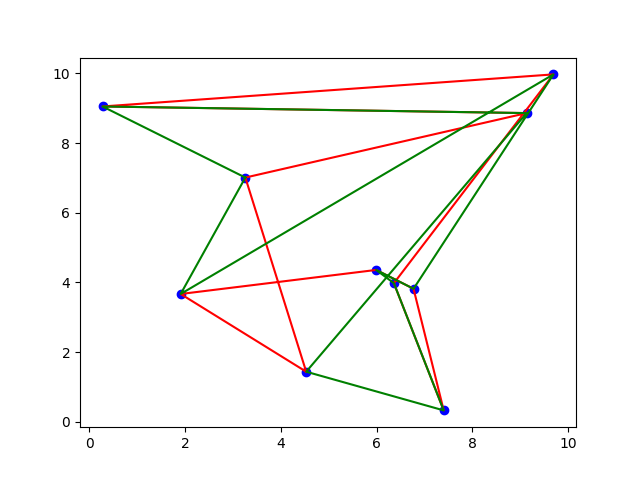

In [18]:
T = 2500          #Set initial temperature
gamma = 0.98      #Set temperature decay rate
xo = np.random.permutation(N) #Generate random permutation of cities to start with 
fig, ax = plt.subplots()    #Create figure and axes 
xall, yall = [], []         #Create list to store cities traversed
xgood, ygood = [], []       #Create list to store current best route traversed
ax.plot(x_cities, y_cities, 'bo') #Plot cities with blue dots
lnall,  = ax.plot([], [], 'r') #Plot current route in red colour
lngood, = ax.plot([], [], 'g') #Plot best route in green colour
bestcost = f(xo)               #Initial best cost is f(xo)
bestx = xo                     #Initial best x is xo
x = xo                         #Set x to be xo

def onestep(frame):
    global bestx, bestcost, x, xall, yall, T, gamma, xgood, ygood #Load global variables used
    temp = T          
    decay_rate = gamma
    y = f(x)
    if y < bestcost :  #If y is less than best cost then update best cost and change graph
        bestcost = y
        bestx = x
        #The below 4 lines update the best route available
        for i in x:
            xgood.append(x_cities[i]) #Appends N cities 
            ygood.append(y_cities[i])
        xgood.append(xgood[0])  #This line is needed to return from last city to first city
        ygood.append(ygood[0])
    else :
        toss = np.random.random_sample() #Generate a uniform random variable between 0 and 1
        if toss < np.exp(-(y-bestcost)/temp) : #If RV is less than exp(-(y-bestcost)/T) then update bestcost and bestx
            bestcost = y
            bestx = x
            #The below 4 lines update the best route available
            for i in x:
                xgood.append(x_cities[i]) #Appends N cities 
                ygood.append(y_cities[i])
            xgood.append(xgood[0])  #This line is needed to return from last city to first city
            ygood.append(ygood[0])
    temp = temp * decay_rate   #Reduce temperature
    x = np.random.permutation(len(xo)) #Generate random permutation of cities for next iteration
    for i in x:
        xall.append(x_cities[i])  #Append current route regardless of whether it is best or not
        yall.append(y_cities[i])
    xall.append(xall[0])  #This line is needed to return from last city to first city
    yall.append(yall[0])
    lngood.set_data(xgood, ygood) #Plot best path available
    lnall.set_data(xall, yall)    #Plot current path
    xall, yall = [], []           #Reset current path
    xgood, ygood = [], []         #Reset old best path
    return lngood,

ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani.save('TSP_10.mp4', writer=writervideo) #Video of the Simulated Annealing Approach
plt.show()

### Additional : Animated plot showing current vs best solution
This is an additional aspect, not being asked to be done specifically in the problem statement. 

The above cell, neatly animates how the Simulated Annealing Algorithm goes through various plausible paths and produces the minimum length path. This is clearly evident from the animation above. 

In [22]:
plt.clf()

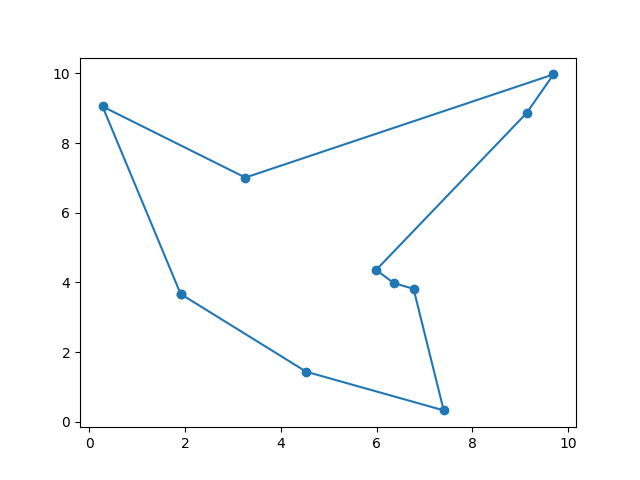

In [23]:
x_city = np.array(x_cities)
y_city = np.array(y_cities)
finalorder =  xopt
xplot = x_city[finalorder] 
yplot = y_city[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

### What does the above cell do ?
The above cell essentially plots the sequence of cities as a closed figure on the graph. This has been asked of us to be shown in the Problem set.

In [24]:
def reset():
    global cities, x_cities, y_cities, N
    cities = []    
    x_cities = []  
    y_cities = []  
    N = 0 

In [25]:
reset()

### What does reset() do ?
The reset function essentially sets all the global parameters to zero so that the next set of test cases can be loaded and tested using simulated annealing. 

In [26]:
plt.close()

## Observations
Initial sequence generated is random in nature 

With Annealing() function used (random permutation generated each time) - 
<html>
    <table>
        <tr>
            <th> Run </th>
            <th> tsp_4 </th>
            <th> tsp_10 </th>
            <th> tsp_100 </th>
        </tr>
        <tr>
            <td> 1 </td>
            <td> 14.64154124236167 </td>
            <td> 34.076561394636684 </td>
            <td> 415.6807636526871 </td>
        </tr>
        <tr>
            <td> 2 </td>
            <td> 14.64154124236167 </td>
            <td> 34.076561394636684 </td>
            <td> 396.8991374613973 </td>
        </tr>
        <tr>
            <td> 3 </td>
            <td> 14.64154124236167 </td>
            <td> 34.076561394636684 </td>
            <td> 90.28052234607274 </td>
        </tr>
    </table>
</html>

With AnnealingMoveSwap() function used (swapping two indices of the permutation given originally) - 
<html>
    <table>
        <tr>
            <th> Run </th>
            <th> tsp_4 </th>
            <th> tsp_10 </th>
            <th> tsp_100 </th>
        </tr>
        <tr>
            <td> 1 </td>
            <td> 14.64154124236167 </td>
            <td> 34.076561394636684 </td>
            <td> 414.05760427612205 </td>
        </tr>
        <tr>
            <td> 2 </td>
            <td> 14.64154124236167 </td>
            <td> 34.076561394636684 </td>
            <td> 409.85760263129686 </td>
        </tr>
        <tr>
            <td> 3 </td>
            <td> 14.64154124236167 </td>
            <td> 34.076561394636684 </td>
            <td> 400.27026169127726 </td>
        </tr>
    </table>
</html>

The above observations are for T = 2500 and $\gamma$ = 0.95 with number of iterations being bounded above by $10^{6}$. The reasons for choosing the values are mentioned below in analogy with the $\epsilon$ greedy policy of reinforcement learning. 

### How to choose T ?
As thermodynamics says, higher the temperature, higher the energy, higher the entropy and thus, higher the randomness. Extremely high temperatures would lead to total randomness, while lower temperatures would lead to almost convergence from very first iteration to the initial value. This is a well studied problem under the domain of Reinforcement Learning (RL) as $\epsilon$- greedy policy. With probability $\epsilon$ explore all the possible solutions and with probability 1-$\epsilon$ exploit the best solution available. It subtly explains the tradeoff between exploration and exploitation as we must do in this problem and thus choosing temperature optimally, becomes very important. Using the widget above, it has been observed that temperatures around 1000 to 5000 are well suited to solve the TSP for 10 and 100 cities.

### How to choose $\gamma$ ?
$\gamma$ or simply the decay parameter, governs how fast the temperature reduces. As evident from the name "Annealing" which is a term taken from metallurgy, which basically tells, heat a metal to high temperatures and cool it slowly to provide uniform finishing. I shall ensure that the temperature falls slowly. This is necessary because faster cooling, lower $\gamma$ would indicate that the exploration is not being done properly, focussing only on exploitation (that is- we cool it rapidly, a process called **Quenching**). Extremely high $\gamma$ (0.98 - 1.00) would indicate that we are focussing only on exploitation and not exploration. Thus, we need to optimally choose $\gamma$. From the use of widgets, it appears that $\gamma$ of 0.95 gives good results. Thus, I chose $\gamma$ = 0.95

### How to fix number of iterations ?
The number of iterations totally depends on how much time you are willing to spend on solving the problem. If you have an hour or so, take number of iterations to be around $10^{9}$ or so, if you have very few minutes to get the answer, take it to be around $10^{5}$ or so. As evident, as we increase the number of iterations, the accuracy increases, however time also increases drastically. This is obtained practically, by altering the values and checking. Interesting to note, if your number of iterations is much larger than the number of possible paths (N!), the Simulated Annealing gives almost excellent results. However, when it is less, the results do not seem much accurate to the correct result. This seems fine since the Travelling Salesman Problem is a NP hard problem.

#### The bottom line being pick a decent temperature (around 3000), high $\gamma$ (around 0.90) and high number of iterations (around $10^{6}$)

## Contrast between Annealing() and AnnealingMoveSwap() - 
Its quite obvious from the observations that Annealing() which implements random permutation works quite better on large data sets as exploration is more as against AnnealingMoveSwap() which does lesser exploration as it just swaps two indices. For example, pick a random sequence $P_1$ first which results in a extremely high cost, now Annealing() will return a random sequence which is most likely to have a lesser cost than $P_1$, while AnnealingMoveSwap() would return a sequence in $\delta$ neighbourhood of sequence $P_1$ resulting in almost a similar cost. However, the situation could be the exact reverse. When initial permutation results in lower cost, AnnealingMoveSwap() would result in a similar lower cost while Annealing may result in a larger cost due to higher exploration as pointed out earlier. In short, Annealing() explores a larger fraction of the State Space over AnnealingMoveSwap() which explores a limited fraction of the State Space.

Thus, it is quite intuitive to conclude (not necessarily true) that on larger number of cities (say above 100), it is better to use the Annealing() function and on smaller number of cities (say around 10 to 100), it is better to use the AnnealingMoveSwap() function.

The statistical mechanics interpretation of annealing has been provided in the beginning.

## Results

#### For TSP 4
The optimal sequence obtained is [3 1 2 0] and its cost is 14.64154124236167

#### For TSP 10
The optimal sequence obtained is [4 3 1 7 9 8 2 0 6 5] and its cost is 34.07656139463668

#### For TSP 100
The optimal sequence obtained is [0 34 95 63 38 57 12 72 92 87 45 47 68 51 49 48 75 58 46 82 98 62 33 32 79 70 1 81 44 37 11 9 66 20 83 91 28 64 96 73 90 71 59 29 53 97 31 55 3 54 21 22 36 80 18 99 7 27 14 93 65 52 39 15 50 42 84 25 86 30 19 6 76 16 88 17 41 4 89 2 5 26 8 23 13 85 10 67 78 35 77 69 43 94 24 74 40 60 61 56] and its cost is 90.28052234607274

### General Comments :
Since we are using a stochastic global search optimization algorithm, the answers we obtain when we run it once may not be the same when we run it again. This is because of the randomness involved in the algorithm. We are using two sources of randomness in our algorithm. 

Firstly, dx is generated randomly, (in the TSP its the permutation x which is random or swapping two indices at random). This source of randomness is inherently obvious as we are using a randomized algorithm.

The second source of randomness is definitely not obvious, the second source of randomness, being generating a uniform random variable and comparing with the probability of modifying already existing best cost and best x. This essentially forms a major part of the **exploration** aspect (in terms of RL) of the TSP Simulated Annealing. It is this secondary randomness that results in a jump from one minima to another minima. Thus, this secondary randomness, also plays a crutial role in this algorithm. 

Overall, Simulated Annealing is a good approach to attack this problem. However, better algorithms exist and could be used to solve much better than Simulated Annealing.

## General Comment on the TSP Problem :
Its quite interesting to note that the result obtained from the travelling salesman problem appears to be specific of some sort. For the example on 10 cities, the TSP results in a closed polygon. Similarly, the problem on 100 cities also appears to be a polygon. Does that imply that the answer is always a polygon joining the outermost points will result in the optimal path ? The answer is no. Otherwise, the problem would have been NP - complete, which implies P = NP. This is obviously a contradiction !